In [21]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [22]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [23]:
frequency='W'
gronum=100
path='C:\\Users\\wuboyuan\\Desktop\\data\\xyz2\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [5]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [24]:
file={}
name=os.listdir(path)
for i in range(len(name)):
    file[i]=os.path.join(path,name[i])

In [25]:
file

{0: 'C:\\Users\\wuboyuan\\Desktop\\data\\xyz2\\turnhsl_5d_sd_bias_3m.csv'}

In [26]:
for u in range(len(file)):
    print(name[u][:-4])
    phn=4*(u+1)
    data=pd.read_csv(file[u],parse_dates=True,index_col=0)#,encoding='gbk' )
    data0=dadjust(data)
    data0=data0.astype(float)
    fre=np.unique(data0.index)
    fre=tradeday.index&fre
    dic={}
    group={}
    a_index={}
    for i in range(len(fre)+1):
        tradeday0=tradeday.loc[fre[i-1]]
        dindex=tradeday0[tradeday0!=0].T.dropna().index
        yzb_index=yzb.loc[fre[i-1]]
        yzb_index=yzb_index[yzb_index==0].T.index
        ust=st.loc[fre[i-1]]
        ust=ust[ust!=1]
        d_gindex=ust[dindex].dropna().index
        d_gindex=d_gindex&yzb_index
        data1=data0.loc[fre[i-1]]
        data1=data1[d_gindex]
        #mvalue1=mvalue.loc[fre[i-1]]
        #mvalue1=mvalue1[d_gindex]
        data1=data1.dropna().astype(float)
        #mvalue1=mvalue1.dropna().astype(float)
        #c_index=data1.index & mvalue1.index
        #data1=data1[c_index]
        #mvalue1=mvalue1[c_index]
        #mvalue1=pd.DataFrame(mvalue1).apply(medianpeak).sort_values(by=fre[i-1],ascending=False)
        data1=pd.DataFrame(data1).apply(medianpeak).sort_values(by=fre[i-1],ascending=False)
        #l_data=np.arange(len(data1)+1)[1:]
        #mvalue1.T.values[0]=l_data/(len(l_data)+1)
        #data1.T.values[0]=l_data/(len(l_data)+1)
        #mvalue1= mvalue1.apply(norm.ppf)
        #data1=data1.apply(norm.ppf)
        #mvalue1=mvalue1.loc[data1.index]
        #mvalue1=sm.add_constant(mvalue1)
        #model = sm.OLS(data1,mvalue1)
        #results = model.fit()
        #d_data=results.resid
        sdata=pd.DataFrame(data1).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=False)#.sort_values(by=0,ascending=True)
        l=len(sdata)
        if i ==0:
                dic[i]=0
        else:
            a_index[i]=d_gindex
            for j in range(int(gronum)):
                group[j]=sdata[round(((j)/int(gronum))*l):round(((j+1)/int(gronum))*l)].index
            dic[i]=copy.deepcopy(group)
    mrate=np.zeros(len(fre)-1)
    dicrate={}
    grorate=np.zeros(int(gronum))
    for j in range(int(gronum)):
        for i in range(len(fre)-1):
            mrate[i]=errate1[dic[i+1][j]].loc[fre[i+1]].mean()
        dicrate[j]= copy.deepcopy(mrate)
    for key in dicrate:
        grorate[key]=dicrate[key].mean()
    num=np.arange(len(grorate))
    
    fig0=plt.figure(phn)
    plt.bar(num,grorate, color = 'b')
    photo1='C:\\Users\\wuboyuan\\Desktop\\data\\xyzpho\\'+name[u][:-4]+'1.png'
    plt.savefig(photo1)
    

    '''
    ic=np.zeros(len(fre)-1)
    for i in range(len(fre)-1):
        data2=data0.loc[fre[i]]
        icdata=data2[dic[i+1][0]].values
        icrate=errate1[dic[i+1][0]].loc[fre[i+1]].values/100
        ic[i]=np.corrcoef(icdata,icrate)[1][0]
    num2=np.arange(len(ic))
    
    fig1=plt.figure(phn-1)
    plt.bar(num2,ic) #排序ic
    photo2='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\'+name[u][:-4]+'2.png'
    plt.savefig(photo2)
    unitnet0=dicrate[0]-0.2
    unitnet=unitnet0.cumsum()
    unitnet=unitnet/100+1
    w_rate=w_rate500.cumsum()+1
    
    fig2=plt.figure(phn-2)
    plt.plot(unitnet,label='factor')
    plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
    photo3='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\'+name[u][:-4]+'3.png'
    plt.savefig(photo3)
    
    fig3=plt.figure(phn-3)
    plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)],label='500')
    photo4='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\'+name[u][:-4]+'4.png'
    plt.savefig(photo4)
    del photo1#,photo2,photo3,photo4,fig0,fig1,fig2,fig3
    '''

turnhsl_5d_sd_bias_3m


In [31]:
a_mrate=np.zeros(len(fre)-1)
a_dicrate={}

In [32]:
for j in range(1):
    for i in range(len(fre)-1):
        a_mrate[i]=errate1[a_index[i+1]].loc[fre[i+1]].mean()
    a_dicrate= copy.deepcopy(a_mrate)

In [40]:
a_unitnet0=a_dicrate
a_unitnet=a_unitnet0.cumsum()
a_unitnet=a_unitnet/100+1
w_rate=w_rate500.cumsum()+1

In [68]:
unitnet0=dicrate[0]
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1

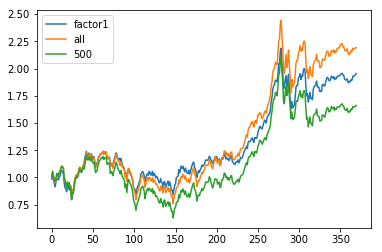

In [69]:
plt.plot(unitnet,label='factor1')
plt.plot(a_unitnet,label='all')
plt.plot(w_rate.T.values[0][0:len(a_unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()